<a href="https://colab.research.google.com/github/gitdesil/dataScientit/blob/main/Copia_de_Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction
## Binary Classification using Logistic Regression

Este conjunto de datos esta relacionado con la aprobación de préstamos hipotecarios o personales. Cada fila representa una solicitud de préstamo con información detallada sobre el solicitante y el préstamo en sí. El objetivo es predecir si una solicitud de préstamo será aprobada o no (Loan_Status) en función de una serie de características del solicitante y del préstamo.

* Loan_ID: Un identificador único para cada solicitud de préstamo.

* Gender: El género del solicitante (Masculino o Femenino).

* Married: Estado civil del solicitante (Sí o No).

* Dependents: El número de dependientes financieros del solicitante.

* Education: El nivel de educación del solicitante (Graduado o No Graduado).

* Self_Employed: Indica si el solicitante es autónomo (Sí o No).

* ApplicantIncome: El ingreso del solicitante principal.

* CoapplicantIncome: El ingreso del co-solicitante, si lo hay.

* LoanAmount: La cantidad del préstamo solicitado en unidades monetarias.

* Loan_Amount_Term: El plazo del préstamo en meses.

* Credit_History: El historial crediticio del solicitante (1.0 indica un historial crediticio positivo, 0.0 indica un historial crediticio negativo o desconocido).

* Property_Area: El área de propiedad del solicitante (por ejemplo, Urbano, Rural o Semiurbano).

* Loan_Status: El estado del préstamo (Y para Aprobado y N para No Aprobado).

Estado actual:

* Se les concede el prestamo : 499 valores
* No se les concede prestamo : 192 valores

### Importacion de librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Exploración general del dataset

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

## Limpieza del data set

Verificación de valores faltantes

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Vamos analizar para cada variable con valores faltantes su descripción

#### GENDER

In [ ]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Como la moda es "Male" asignamos a los faltantes de Gender "Male"

In [ ]:
df['Gender']=df['Gender'].fillna("Male")

#### MARRIED

In [ ]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Como la moda es "Yes" asignamos los faltantes con "Yes"

In [ ]:
df['Married']=df['Married'].fillna("Yes")

#### DEPENDENTS

In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Como la moda es 0 entonces imputamos 0 a los faltantes

In [ ]:
df['Dependents']=df['Dependents'].fillna("0")

#### SELF EMPLOYED

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna("No")

#### Loan Amount

In [ ]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

El 75% de los datos esta por debajo de 164 podriamos considerar que ese valor maximo de 700 son atipicos, imputamos con la media

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

#### Loan Amount Term

In [ ]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

#### Credit History

In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

### Confirmamos ausencia de nulos ahora

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Fase exploracion y visualizacion

<Figure size 800x600 with 0 Axes>

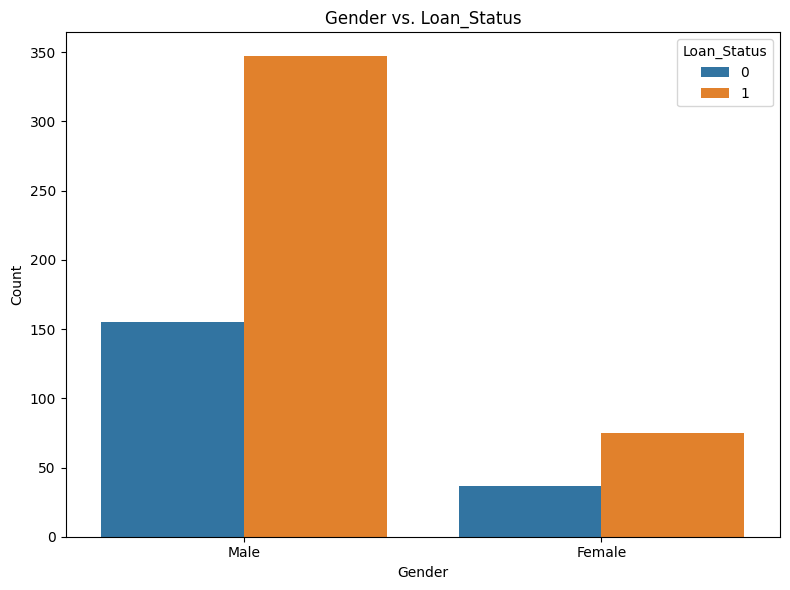

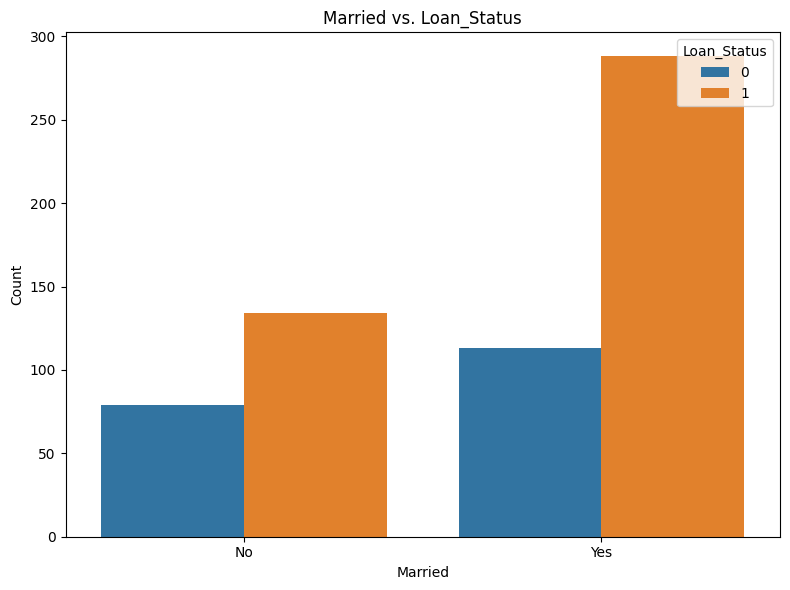

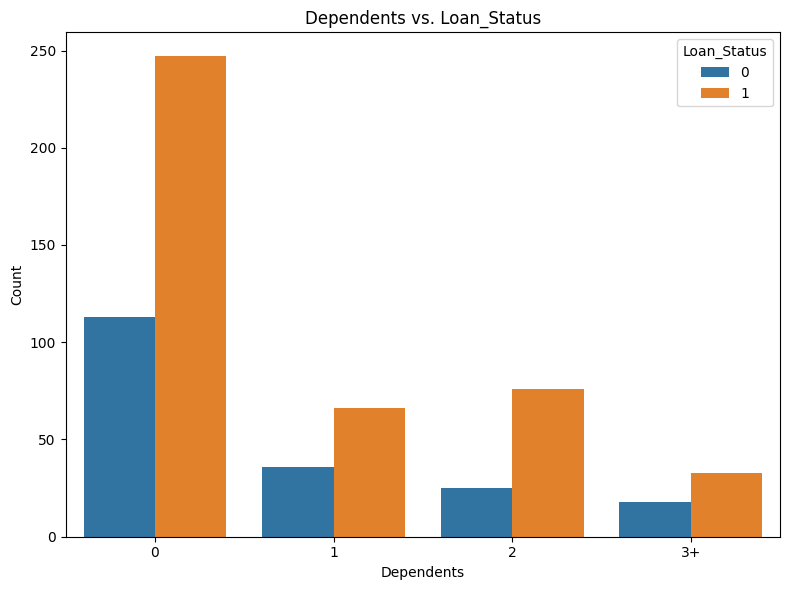

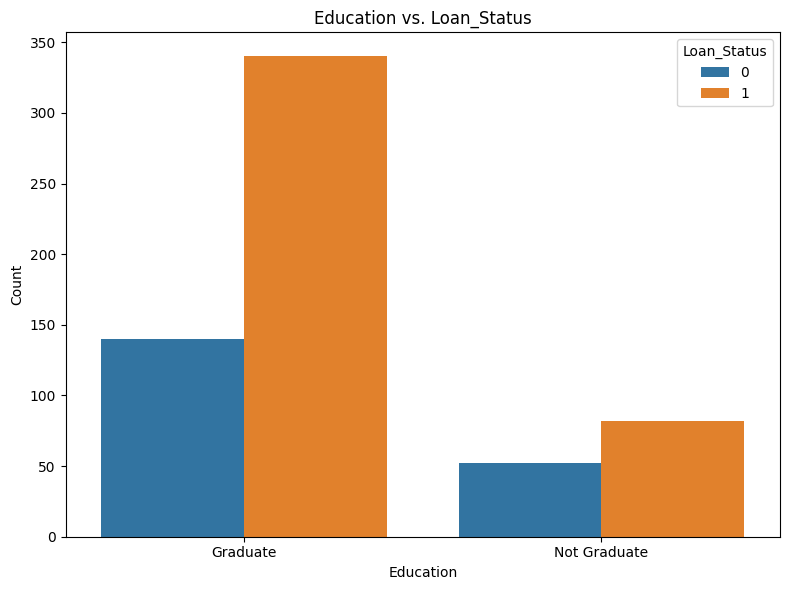

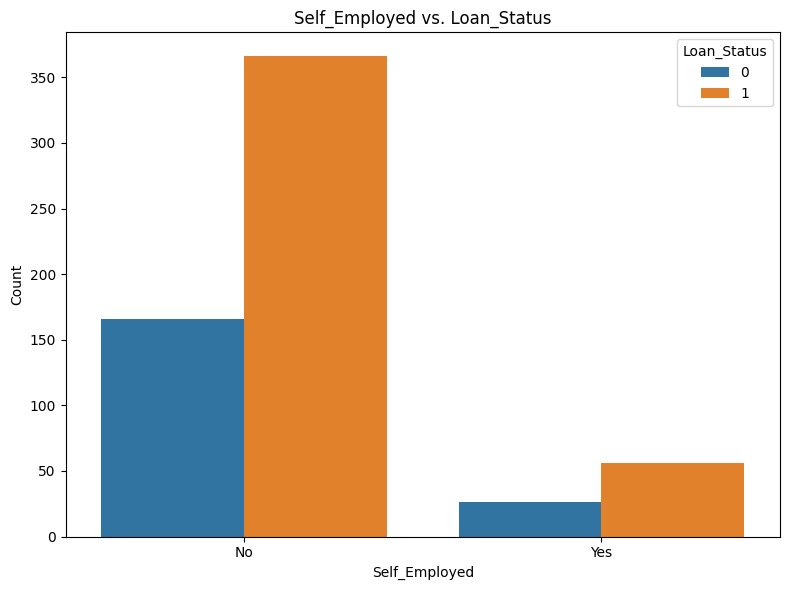

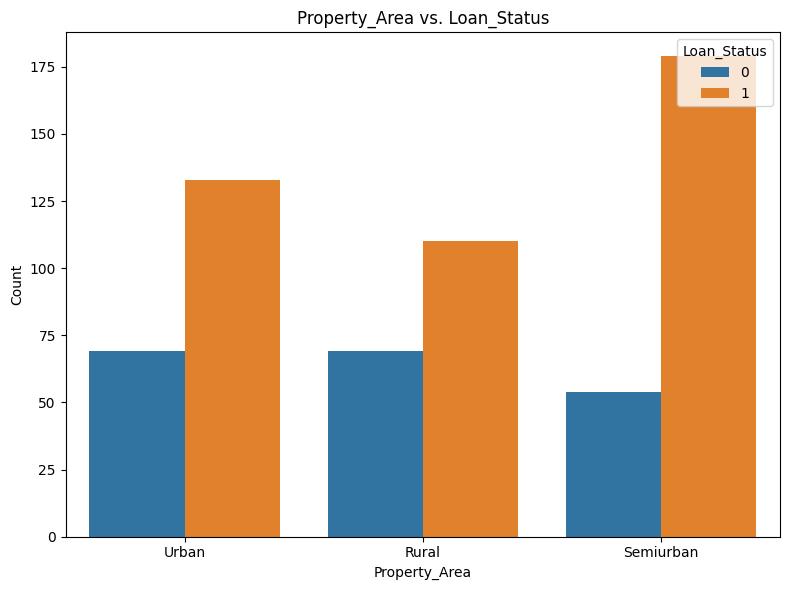

In [ ]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(8, 6))

# Lista de las columnas categóricas que quieres graficar
columnas_categoricas = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Ciclo para crear los countplots por separado
for columna in columnas_categoricas:
    plt.figure(figsize=(8, 6))  # Ajusta el tamaño de cada gráfica individual
    sns.countplot(data=df, x=columna, hue='Loan_Status')
    plt.title(f'{columna} vs. Loan_Status')
    plt.xlabel(columna)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status', loc='upper right')
    plt.tight_layout()
    plt.show()




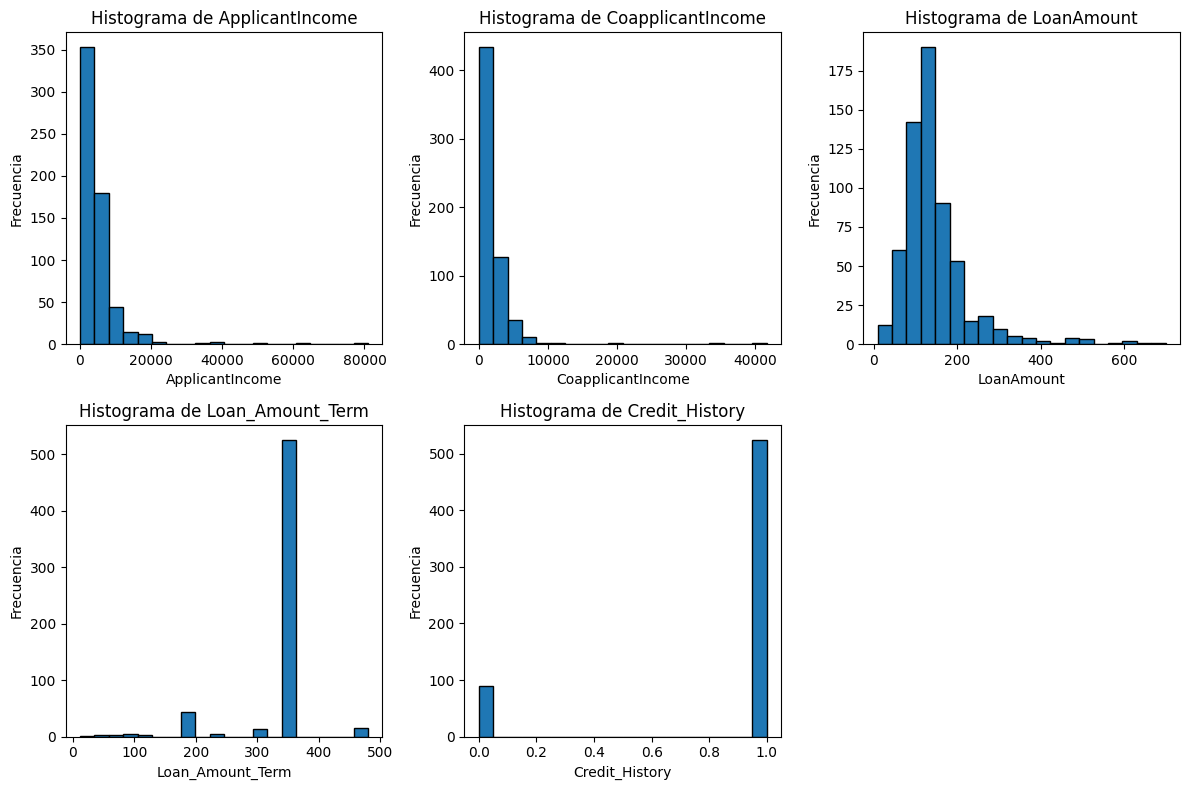

In [ ]:
# Lista de las columnas numéricas
columnas_numericas = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Ciclo para crear histogramas para cada variable numérica
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[columna], bins=20, edgecolor='k')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajusta el diseño de los subplots
plt.tight_layout()

# Muestra la figura
plt.show()


### Fase modelo

Codificacion de variables

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [ ]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [ ]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [ ]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

### Final DataFrame

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Importacion de paquetes de modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Division en Train y Test set

In [ ]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Logistic Regression (LR)

La regresión logística es un algoritmo de clasificación de aprendizaje supervisado utilizado para predecir la probabilidad de una variable objetivo.

Matemáticamente, un modelo de regresión logística predice P(Y=1) como una función de X. Es uno de los algoritmos de aprendizaje automático más simples que se pueden utilizar para diversos problemas de clasificación, como la detección de spam, la predicción de la diabetes, la detección del cáncer, etc


#### Sigmoid Function

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
lr_prediction = model.predict(X_test)



In [ ]:
print("Prediccion",lr_prediction)
print("Etiquetas reales",y_test)

Prediccion [1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
Etiquetas reales [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0]


In [ ]:
# Crear un DataFrame con las predicciones y las etiquetas reales
data = {'Predicción': lr_prediction, 'Etiquetas Reales': y_test}

# Crear un DataFrame para verificar si son iguales o diferentes
resultado = pd.DataFrame(data)

# Agregar una columna que indique si son iguales o diferentes
resultado['Comparación'] = resultado['Predicción'] == resultado['Etiquetas Reales']

# Imprimir el DataFrame
resultado.head()


,Predicción,Etiquetas Reales,Comparación
0,1,1,True
1,1,1,True
2,1,1,True
3,1,0,False
4,1,1,True


In [ ]:
resultado['Comparación'].value_counts()

True     131
False     32
Name: Comparación, dtype: int64

In [ ]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.803680981595092


Tiene un 80% de precisión para clasificar